In [58]:
!pip install plotly
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error

In [83]:
df=pd.read_csv(r"D:\AI-ML-DS\fish_participant.csv")

In [84]:
df.sample(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
110,Perch,300.0,26.9,28.7,30.1,7.5852,4.6354
12,Whitefish,270.0,24.1,26.5,29.3,8.1454,4.2485
90,Bream,720.0,32.0,35.0,40.6,16.3618,6.0900
67,Roach,390.0,29.5,31.7,35.0,9.4850,5.3550
28,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  111 non-null    object 
 1   Weight   111 non-null    float64
 2   Length1  111 non-null    float64
 3   Length2  111 non-null    float64
 4   Length3  111 non-null    float64
 5   Height   111 non-null    float64
 6   Width    111 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.2+ KB


In [86]:
df=df.drop(columns=['Species'])
#Though We can see via data that we need a linear regression model I am just checking relation via plotting 

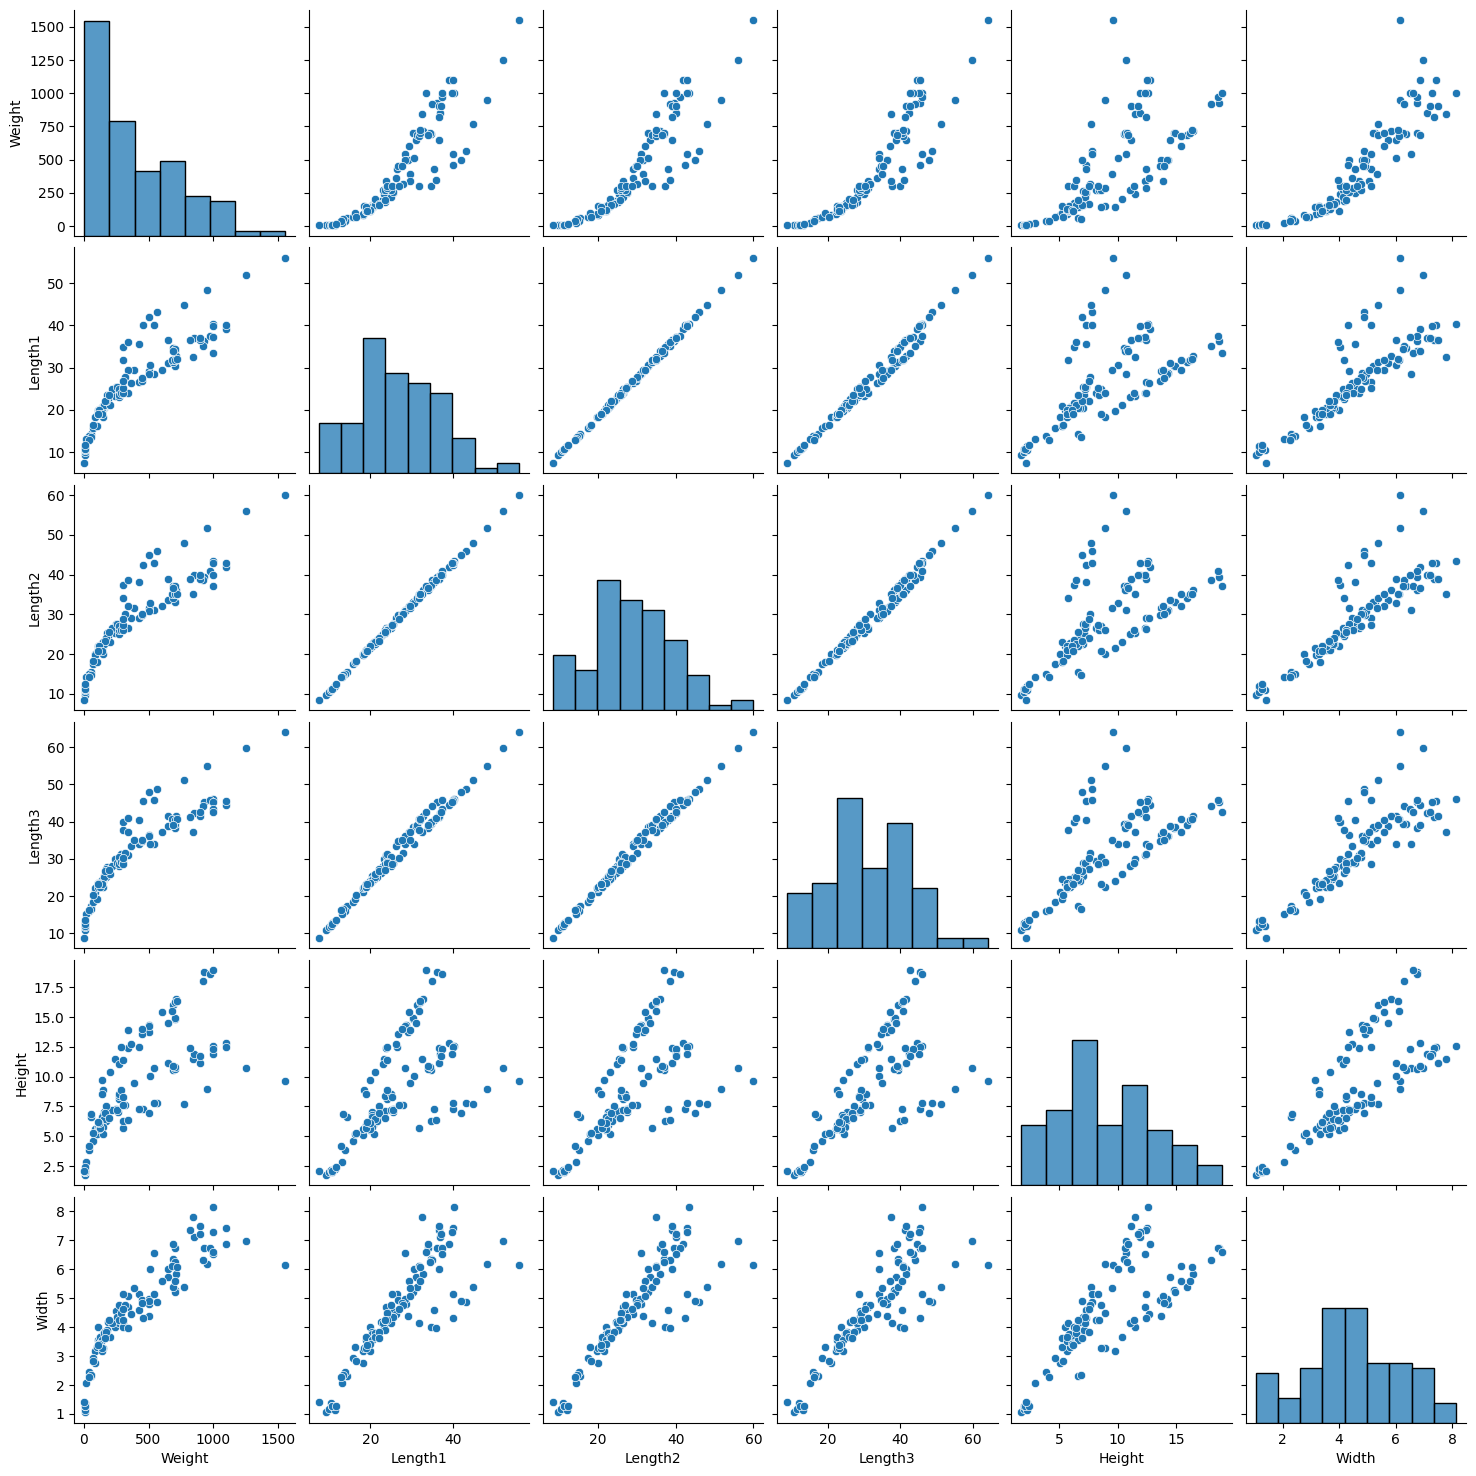

In [87]:
sns.pairplot(df)#using to decide whether to use feature engineering and yah we can also see the O/P(Weight) has as Polynomial Relation with other features

In [88]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Weight']),df['Weight'],test_size=0.2,random_state=42)

In [89]:
x_train.sample(5)

,Length1,Length2,Length3,Height,Width
100,37.3,40.0,43.5,12.3540,6.5250
50,11.3,11.8,13.1,2.2139,1.2838
7,25.4,27.5,28.9,7.2828,4.5662
89,21.2,23.0,25.8,10.3458,3.6636
62,10.8,11.3,12.6,1.9782,1.2852


In [90]:
y_train.sample(5)

2     160.0
28      7.5
77    680.0
44    840.0
6     700.0
Name: Weight, dtype: float64

In [91]:
clf=LinearRegression()

In [92]:
clf.fit(x_train,y_train)

LinearRegression()

In [93]:
r2_score(y_test,clf.predict(x_test))#90%

0.9074554022843798

In [94]:
mean_absolute_error(y_test,clf.predict(x_test))#79.5

79.44729789960357

In [95]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Weight']),df['Weight'],test_size=0.2,random_state=42)

In [96]:
x_train

,Length1,Length2,Length3,Height,Width
26,30.5,32.8,34.0,10.0300,6.0180
22,13.5,14.7,16.5,6.8475,2.3265
31,16.2,18.0,19.2,5.2224,3.3216
47,31.4,34.0,39.2,15.9936,5.3704
76,23.6,26.0,28.7,8.3804,4.2476
...,...,...,...,...,...
106,23.5,25.6,27.0,6.5610,4.2390
14,28.7,31.0,36.2,14.3714,4.8146
92,16.5,18.2,20.3,5.2983,2.8217
51,23.0,25.0,28.0,11.0880,4.1440


In [123]:
GD=SGDRegressor(penalty='l2', max_iter=10000000,learning_rate='constant', eta0=0.00000001)

In [124]:
GD.fit(x_train,y_train)

SGDRegressor(eta0=1e-08, learning_rate='constant', max_iter=10000000)

In [125]:
r2_score(y_test,GD.predict(x_test))#83%

0.8292142291880407

In [126]:
#feature engineering
df['Length']=df['Length1']*df['Length2']*df['Length3']
df=df.drop(columns=['Length1','Length2','Length3'])

In [128]:
df.head(5)

,Weight,Height,Width,Length
0,430.0,12.4440,5.1340,26129.000
1,110.0,5.5225,3.9950,10340.000
2,160.0,7.0334,3.8203,11669.625
3,60.0,6.5772,2.3142,3856.710
4,700.0,14.8604,5.2854,38422.560


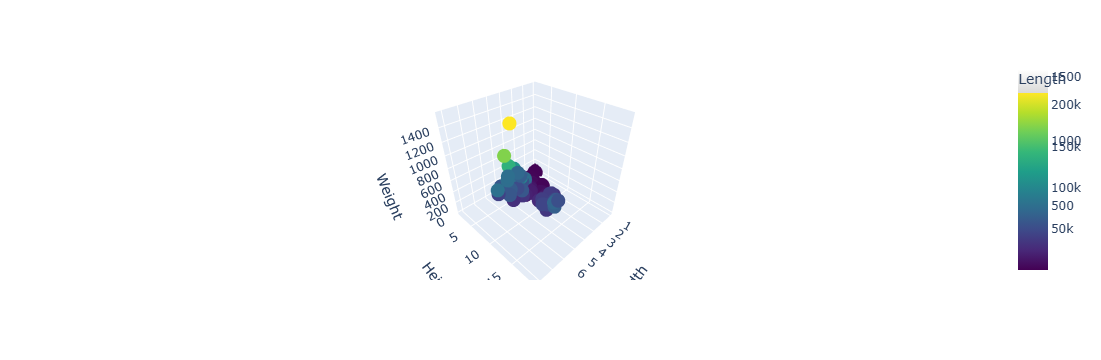

In [129]:
fig = px.scatter_3d(df, x=df['Width'], y=df['Height'], z=df['Weight'], color=df['Length'], color_continuous_scale='Viridis')
fig.add_trace(go.Surface(x=df['Width'], y=df['Height'], z=df['Weight'], name='Plane', opacity=0.5, colorscale='gray'))
fig.show()

In [130]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Weight']),df['Weight'],test_size=0.2,random_state=42)

In [131]:
x_train.sample(5)

,Height,Width,Length
35,7.7920,4.8700,96776.640
16,10.5717,6.3666,50311.860
91,8.8768,4.4968,18220.800
15,6.7334,4.1658,14566.152
38,5.9532,3.6300,11371.338


In [132]:
clf=LinearRegression()

In [133]:
clf.fit(x_train,y_train)

LinearRegression()

In [136]:
r2_score(y_test,clf.predict(x_test))#94%

0.9435101948307197

In [138]:
mean_absolute_error(y_test,clf.predict(x_test))#62%

62.032165754396296